In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


**Cloning Yolov9 github repository**

In [6]:
!git clone https://github.com/SkalskiP/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 147 (delta 16), reused 14 (delta 14), pack-reused 122
Receiving objects: 100% (147/147), 607.60 KiB | 2.00 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [15]:
!pwd

/content/drive/MyDrive/yolov9


In [16]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/yolov9


**Installing Pretrained Weights**

In [17]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [18]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

**Testing pretrained yolov9's capabilities on random image**

In [20]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/drive/MyDrive/yolov9/weights/gelan-c.pt'], source=/content/drive/MyDrive/yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/yolov9/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 118.1ms
Speed: 0.5ms pre-process, 118.1ms inference, 526.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


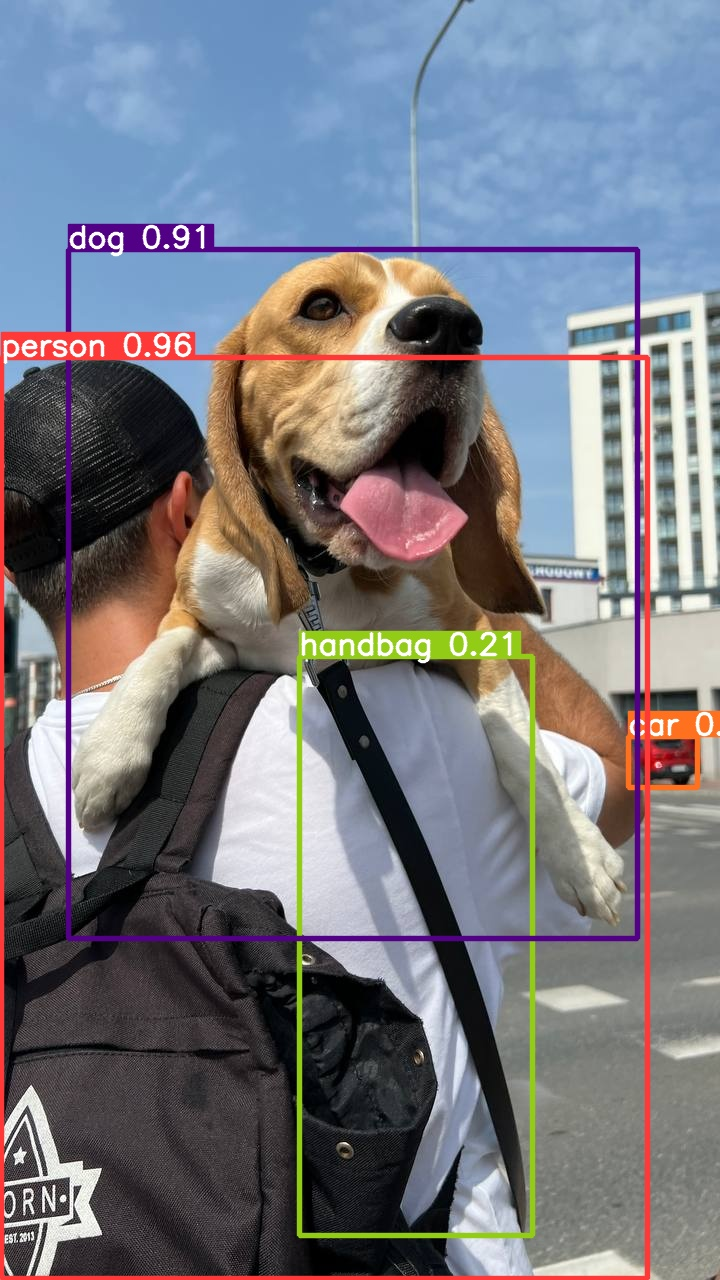

In [27]:
from IPython.display import Image
import os

# Update the path to match where YOLOv5 saves results
result_image_path = f"{HOME}/runs/detect/exp2/dog.jpeg"
Image(filename=result_image_path, width=600)


In [28]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/drive/MyDrive/yolov9/weights/yolov9-e.pt'], source=/content/drive/MyDrive/yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/yolov9/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 154.6ms
Speed: 0.5ms pre-process, 154.6ms inference, 494.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


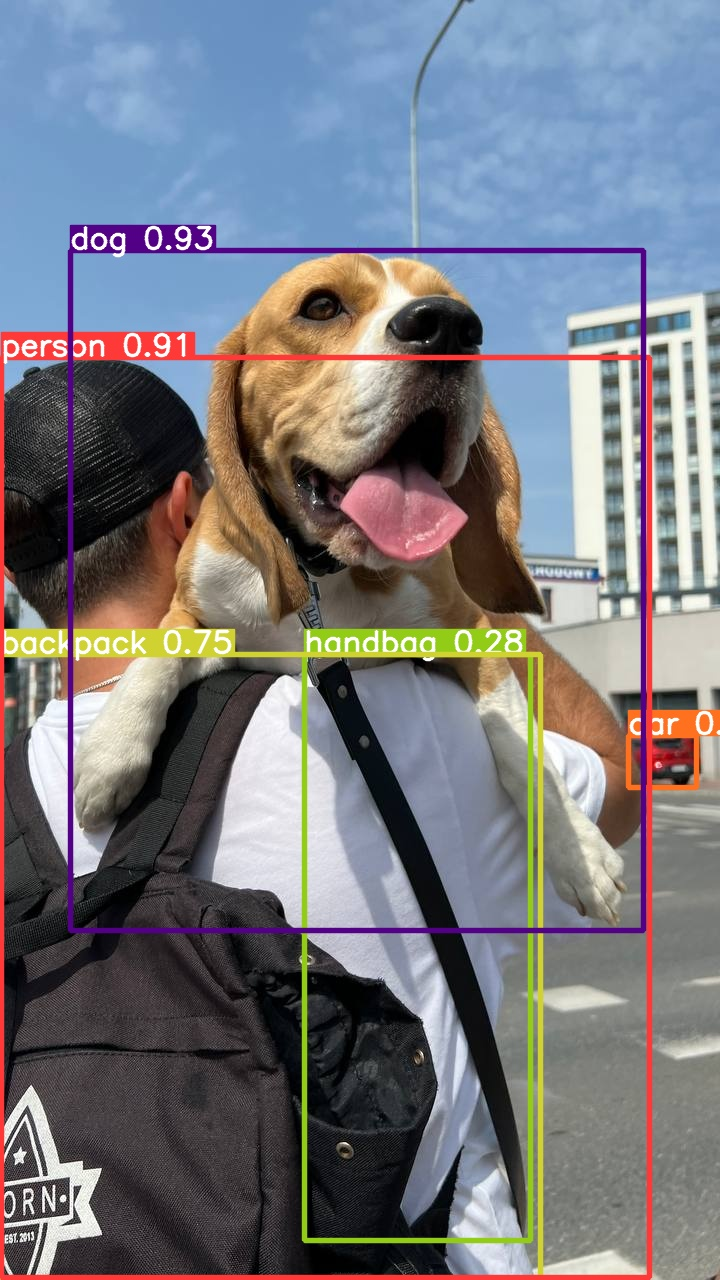

In [30]:
Image(filename=f"{HOME}/runs/detect/exp3/dog.jpeg", width=600)

In [34]:
!pip install roboflow


In [40]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 9.1 MB/s eta 0:00:00


**Installing same breast masses dataset from roboflow**

In [41]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mIMyuivGqxgfT9d9V4WK")
project = rf.workspace("breast-cancer-ce1zx").project("breast-cancer-jtuaz")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.18, to fix: `pip install ultralytics==8.0.196`


**Model Training using Yolov9's GELAN-C architecture**

In [42]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

[Errno 2] No such file or directory: '/content/drive/MyDrive/yolov9/yolov9'
/content/drive/MyDrive/yolov9
2024-02-26 10:48:35.306494: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 10:48:35.306546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 10:48:35.307858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/yolov9/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/drive/MyDrive/yolov9/breast-cancer-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=Fal

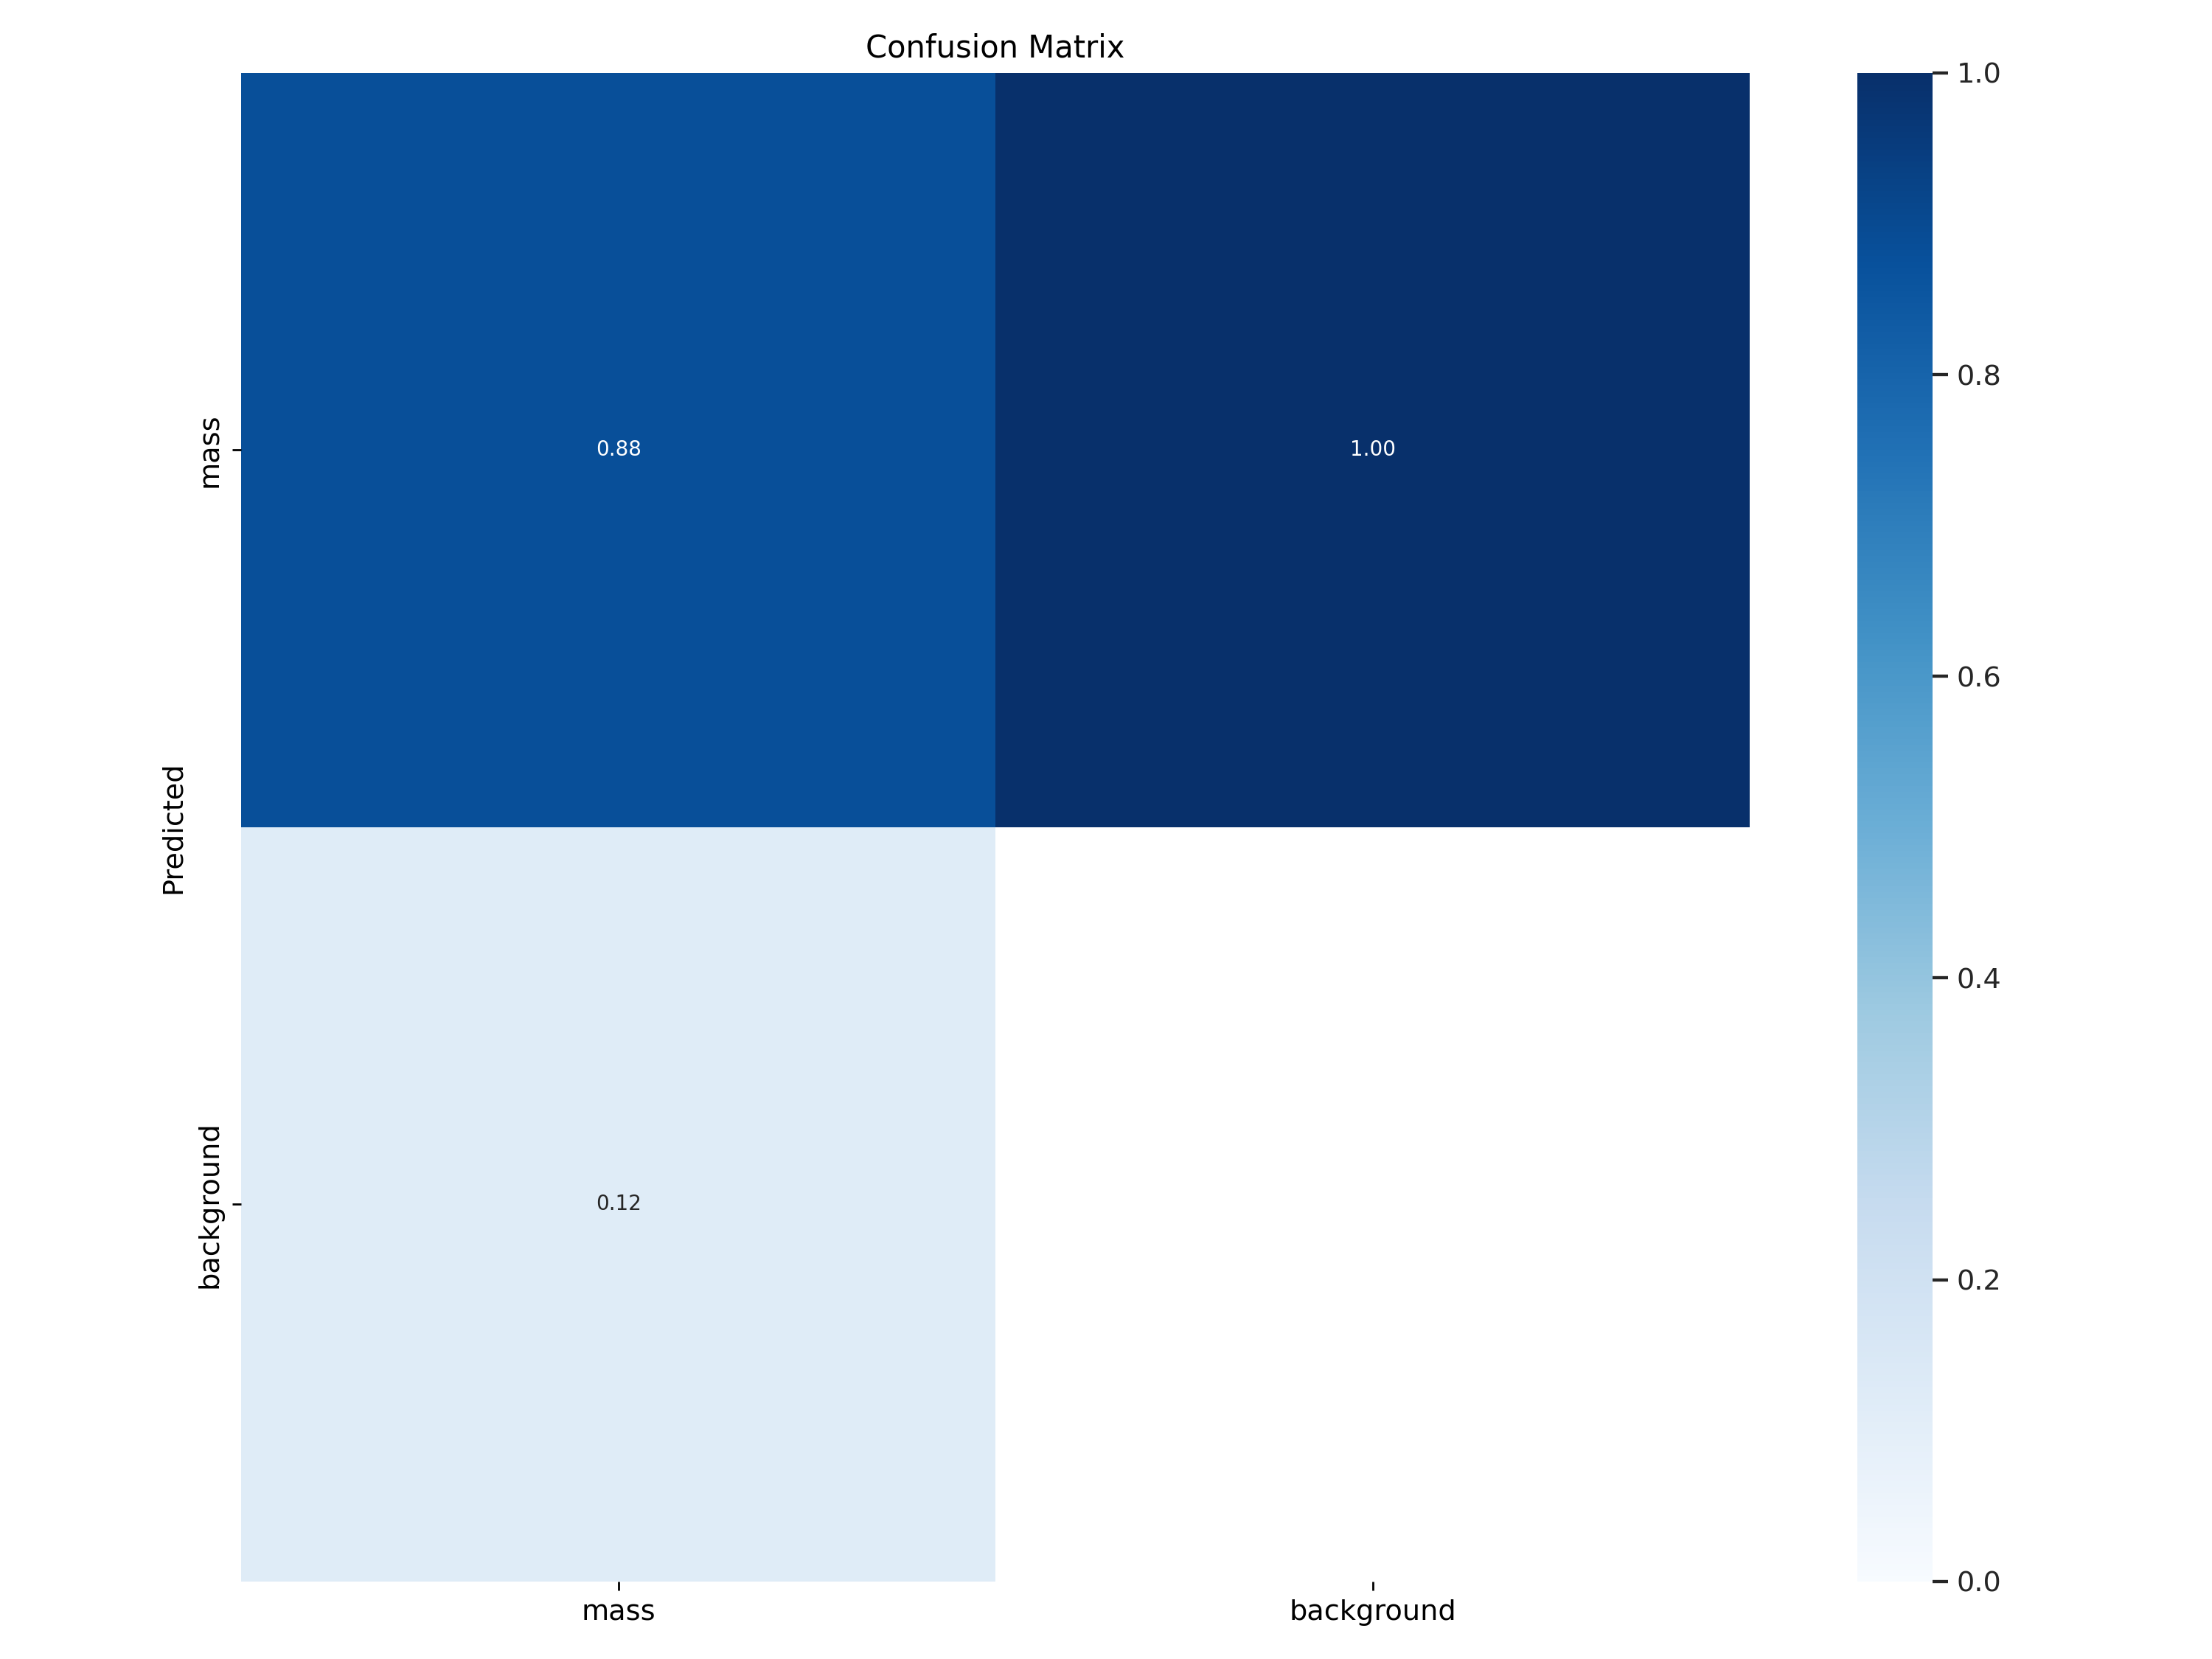

In [45]:
Image(filename=f"{HOME}/runs/train/exp/confusion_matrix.png", width=600)

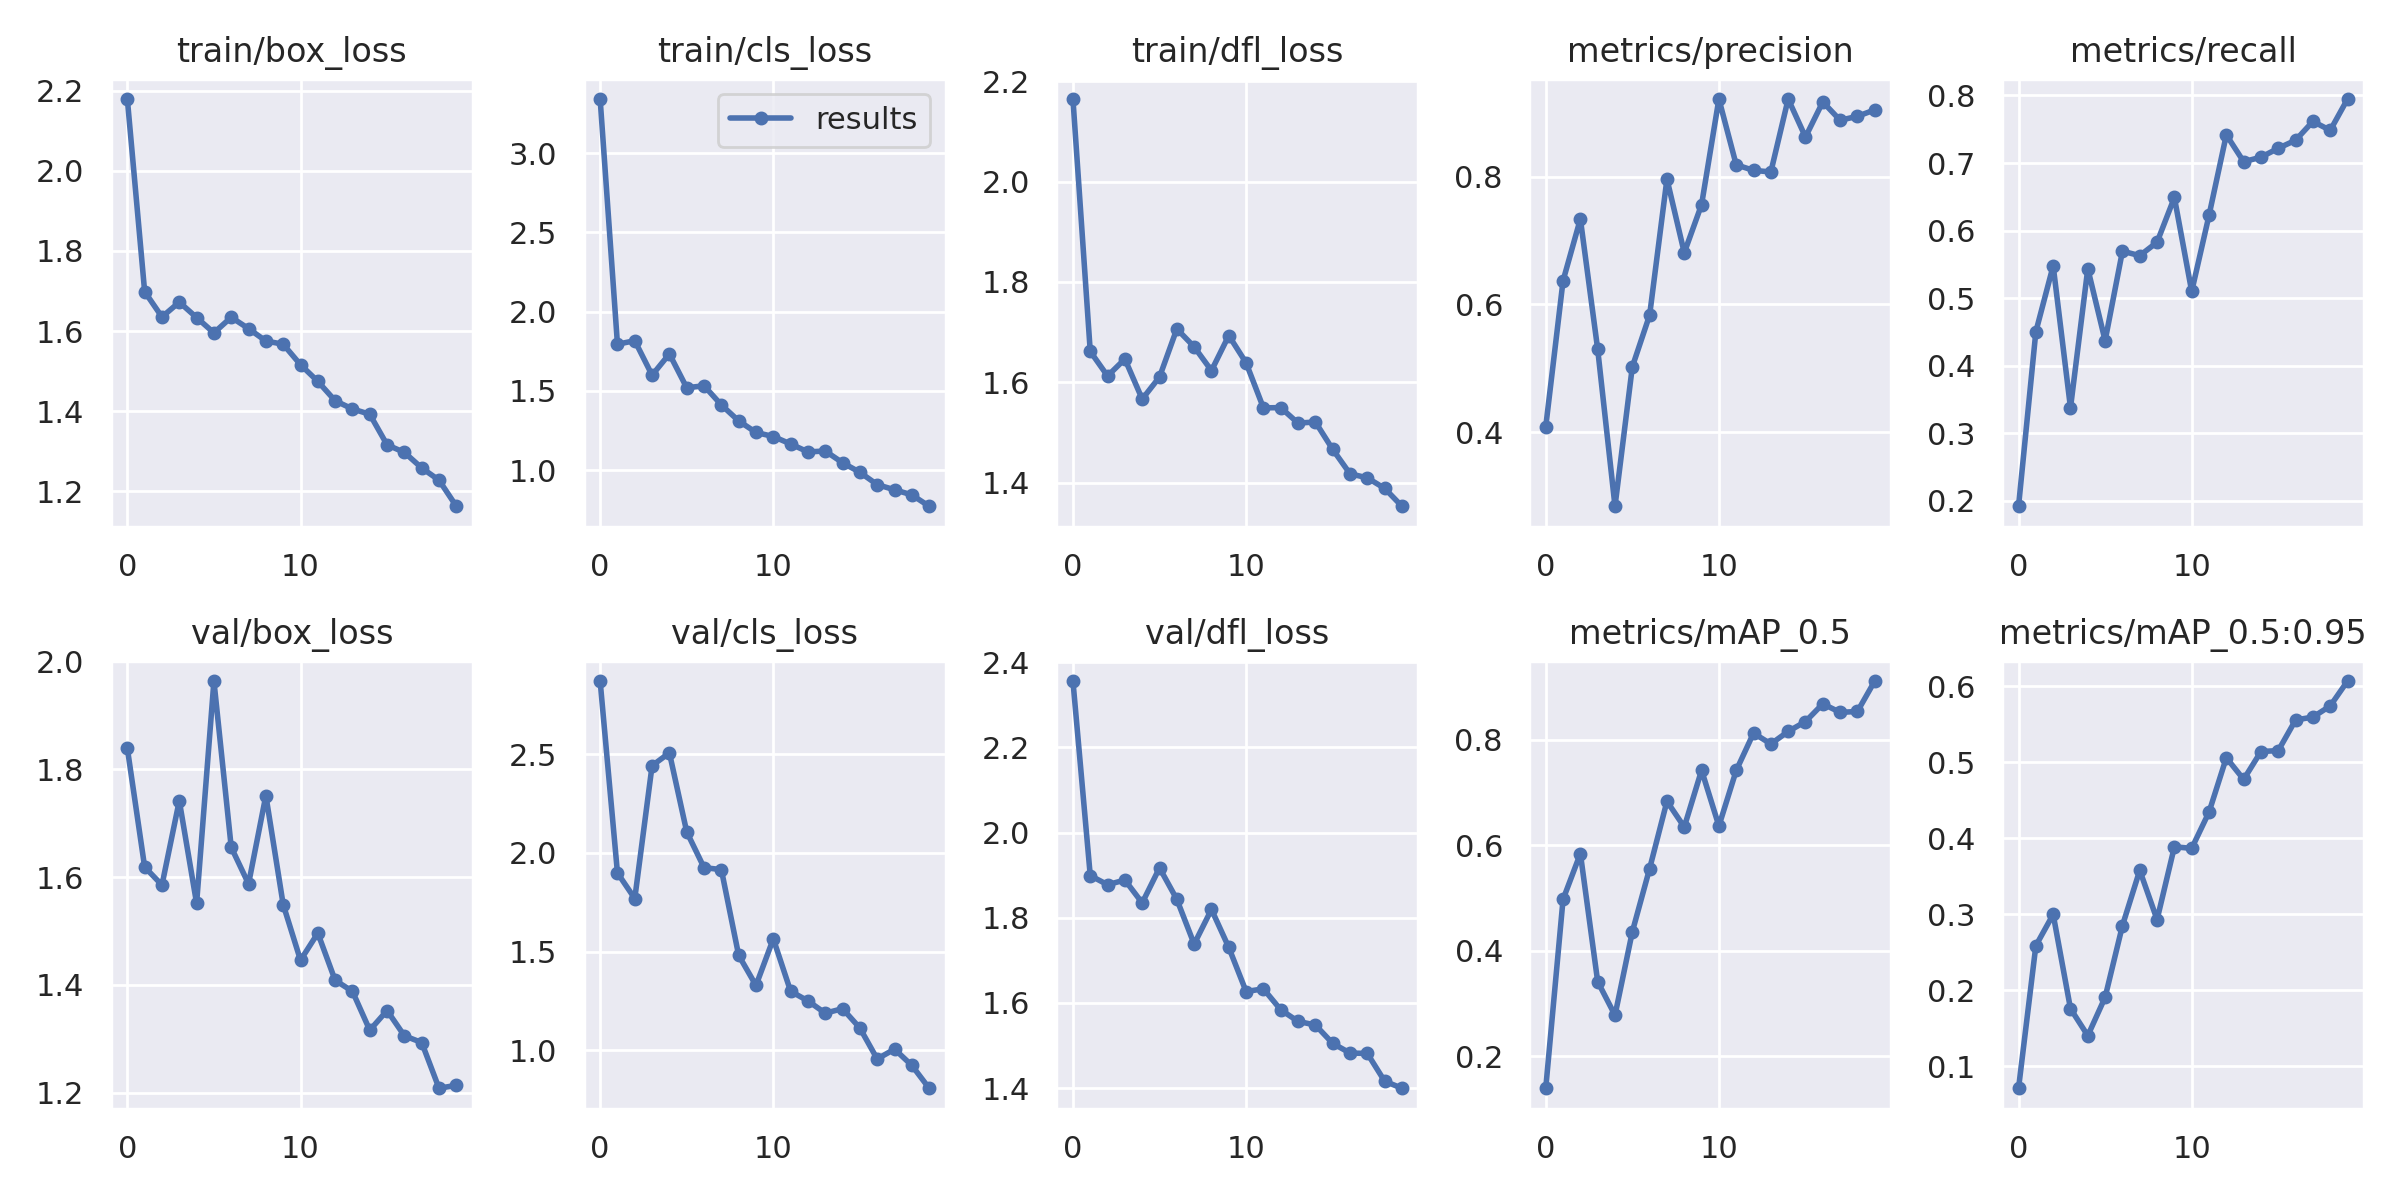

In [46]:
Image(filename=f"{HOME}/runs/train/exp/results.png", width=600)

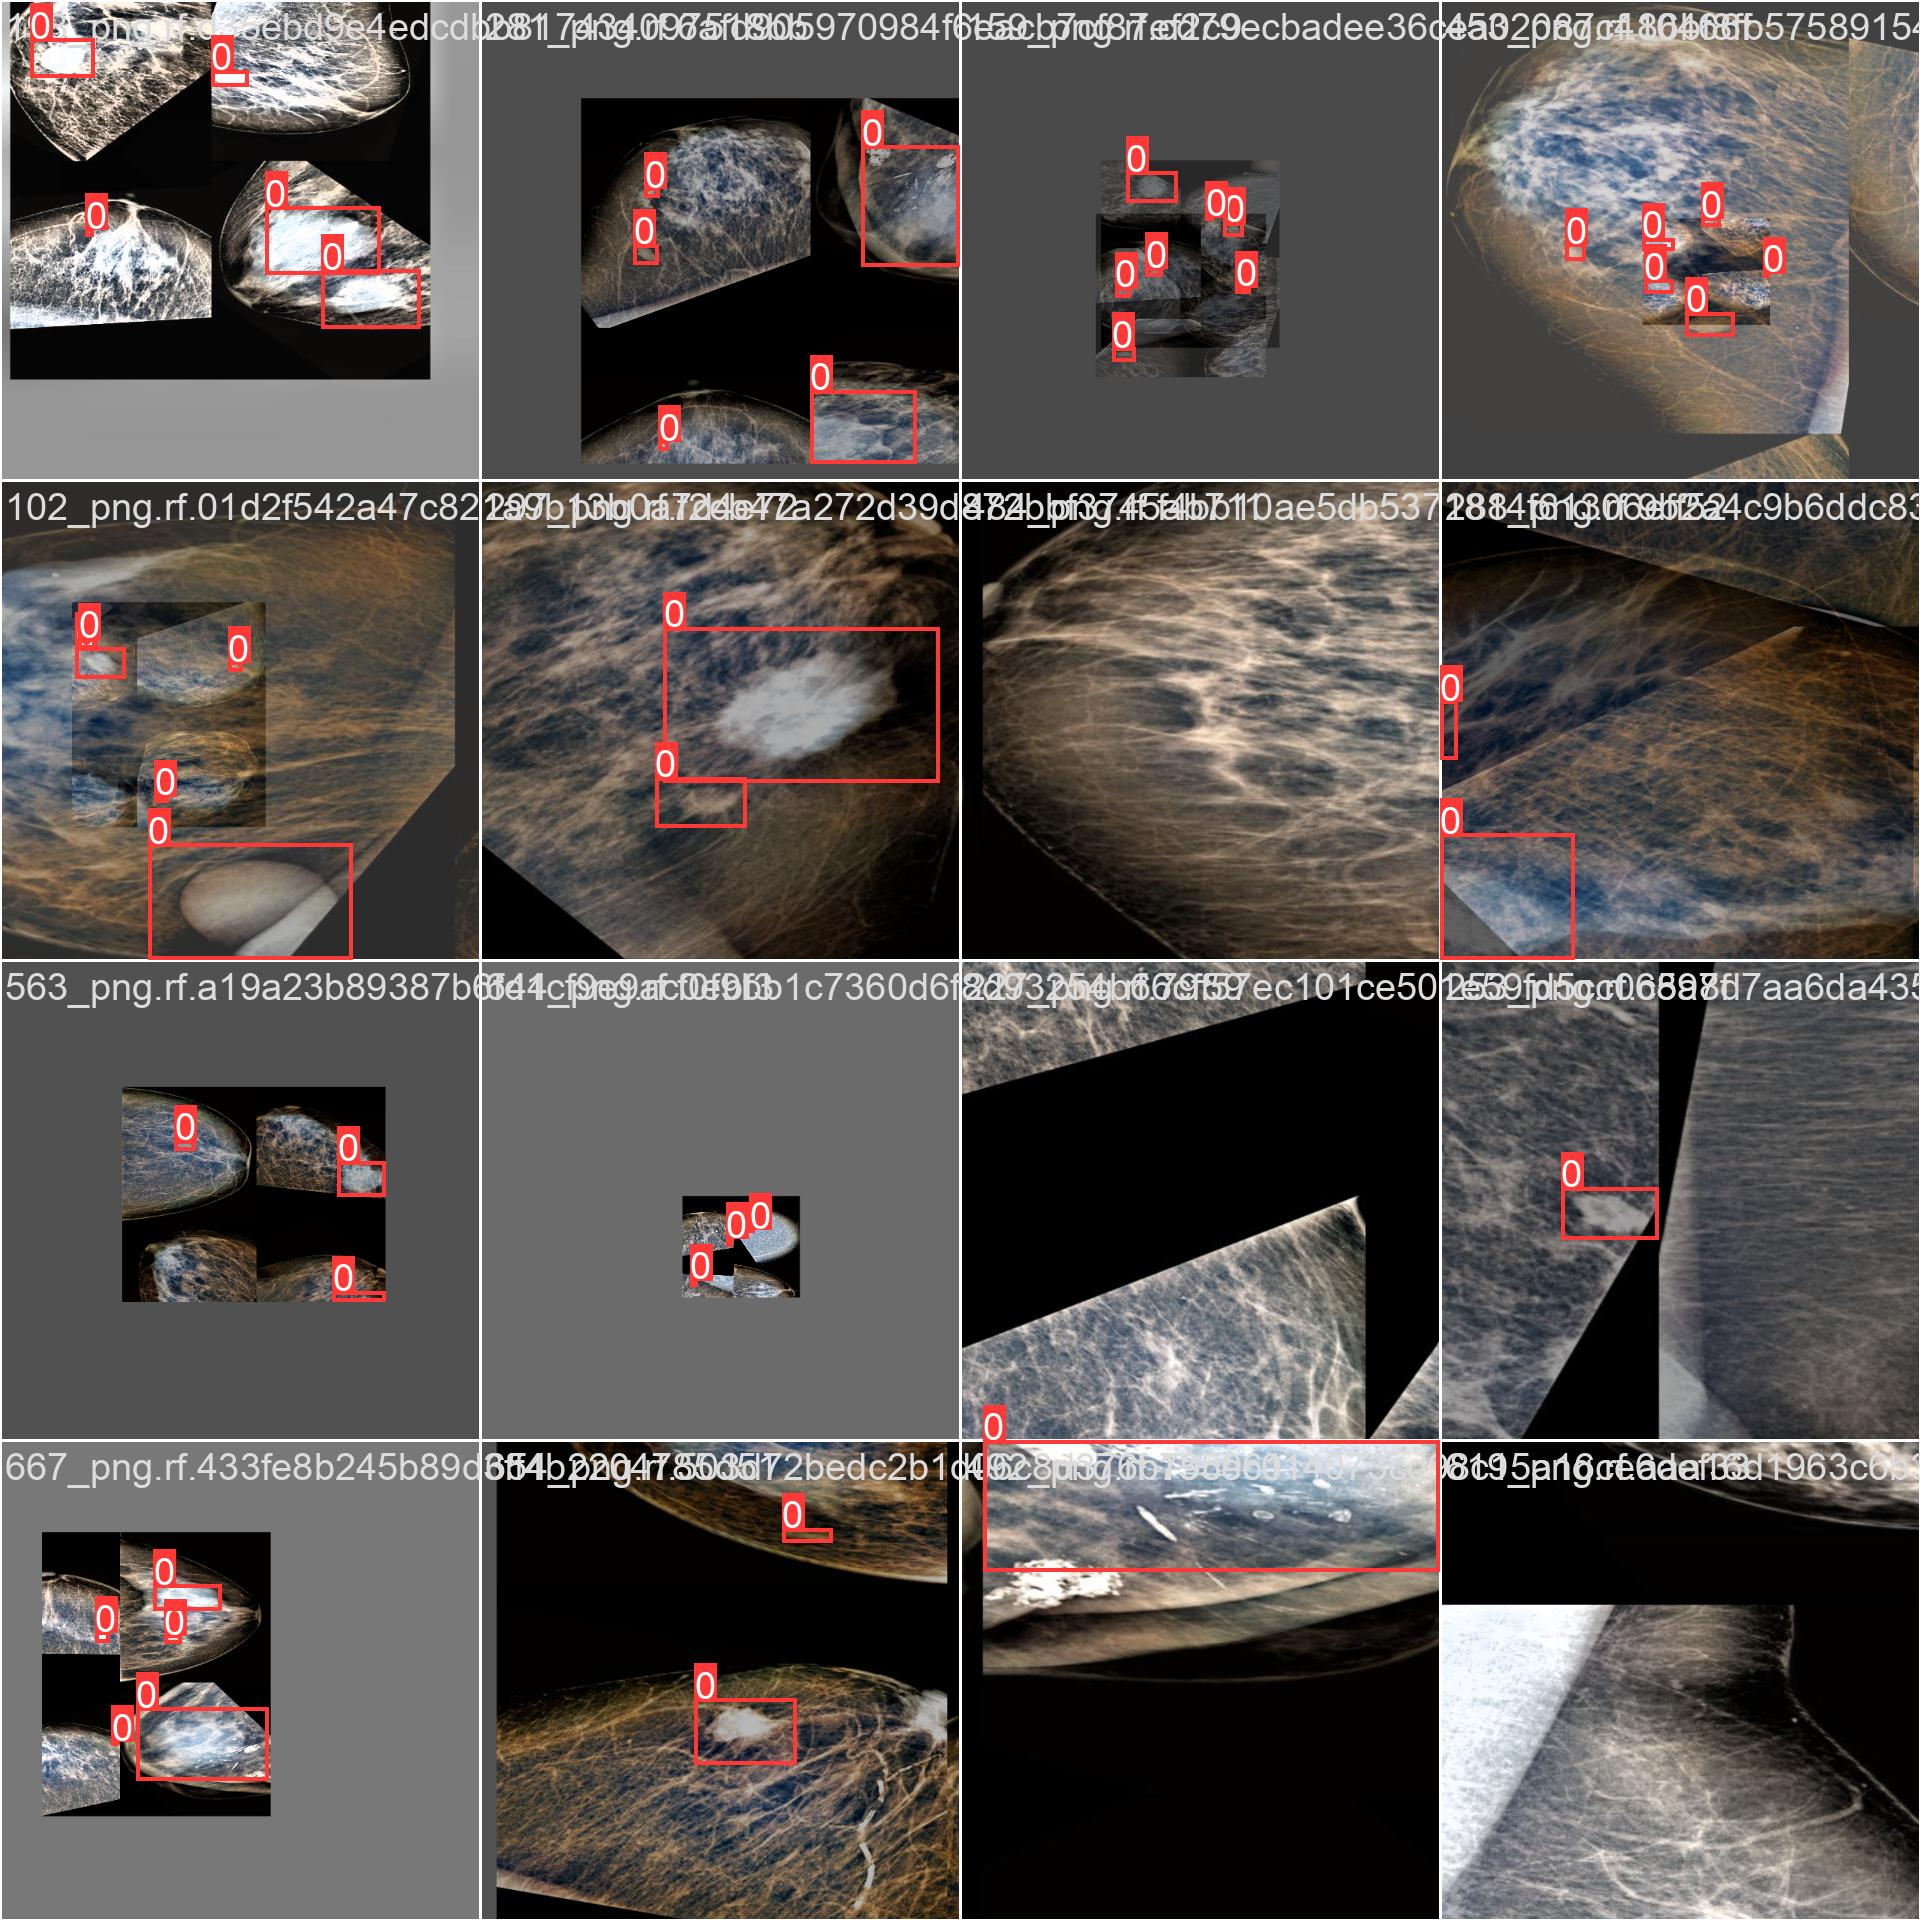

In [47]:
Image(filename=f"{HOME}/runs/train/exp/train_batch1.jpg", width=600)

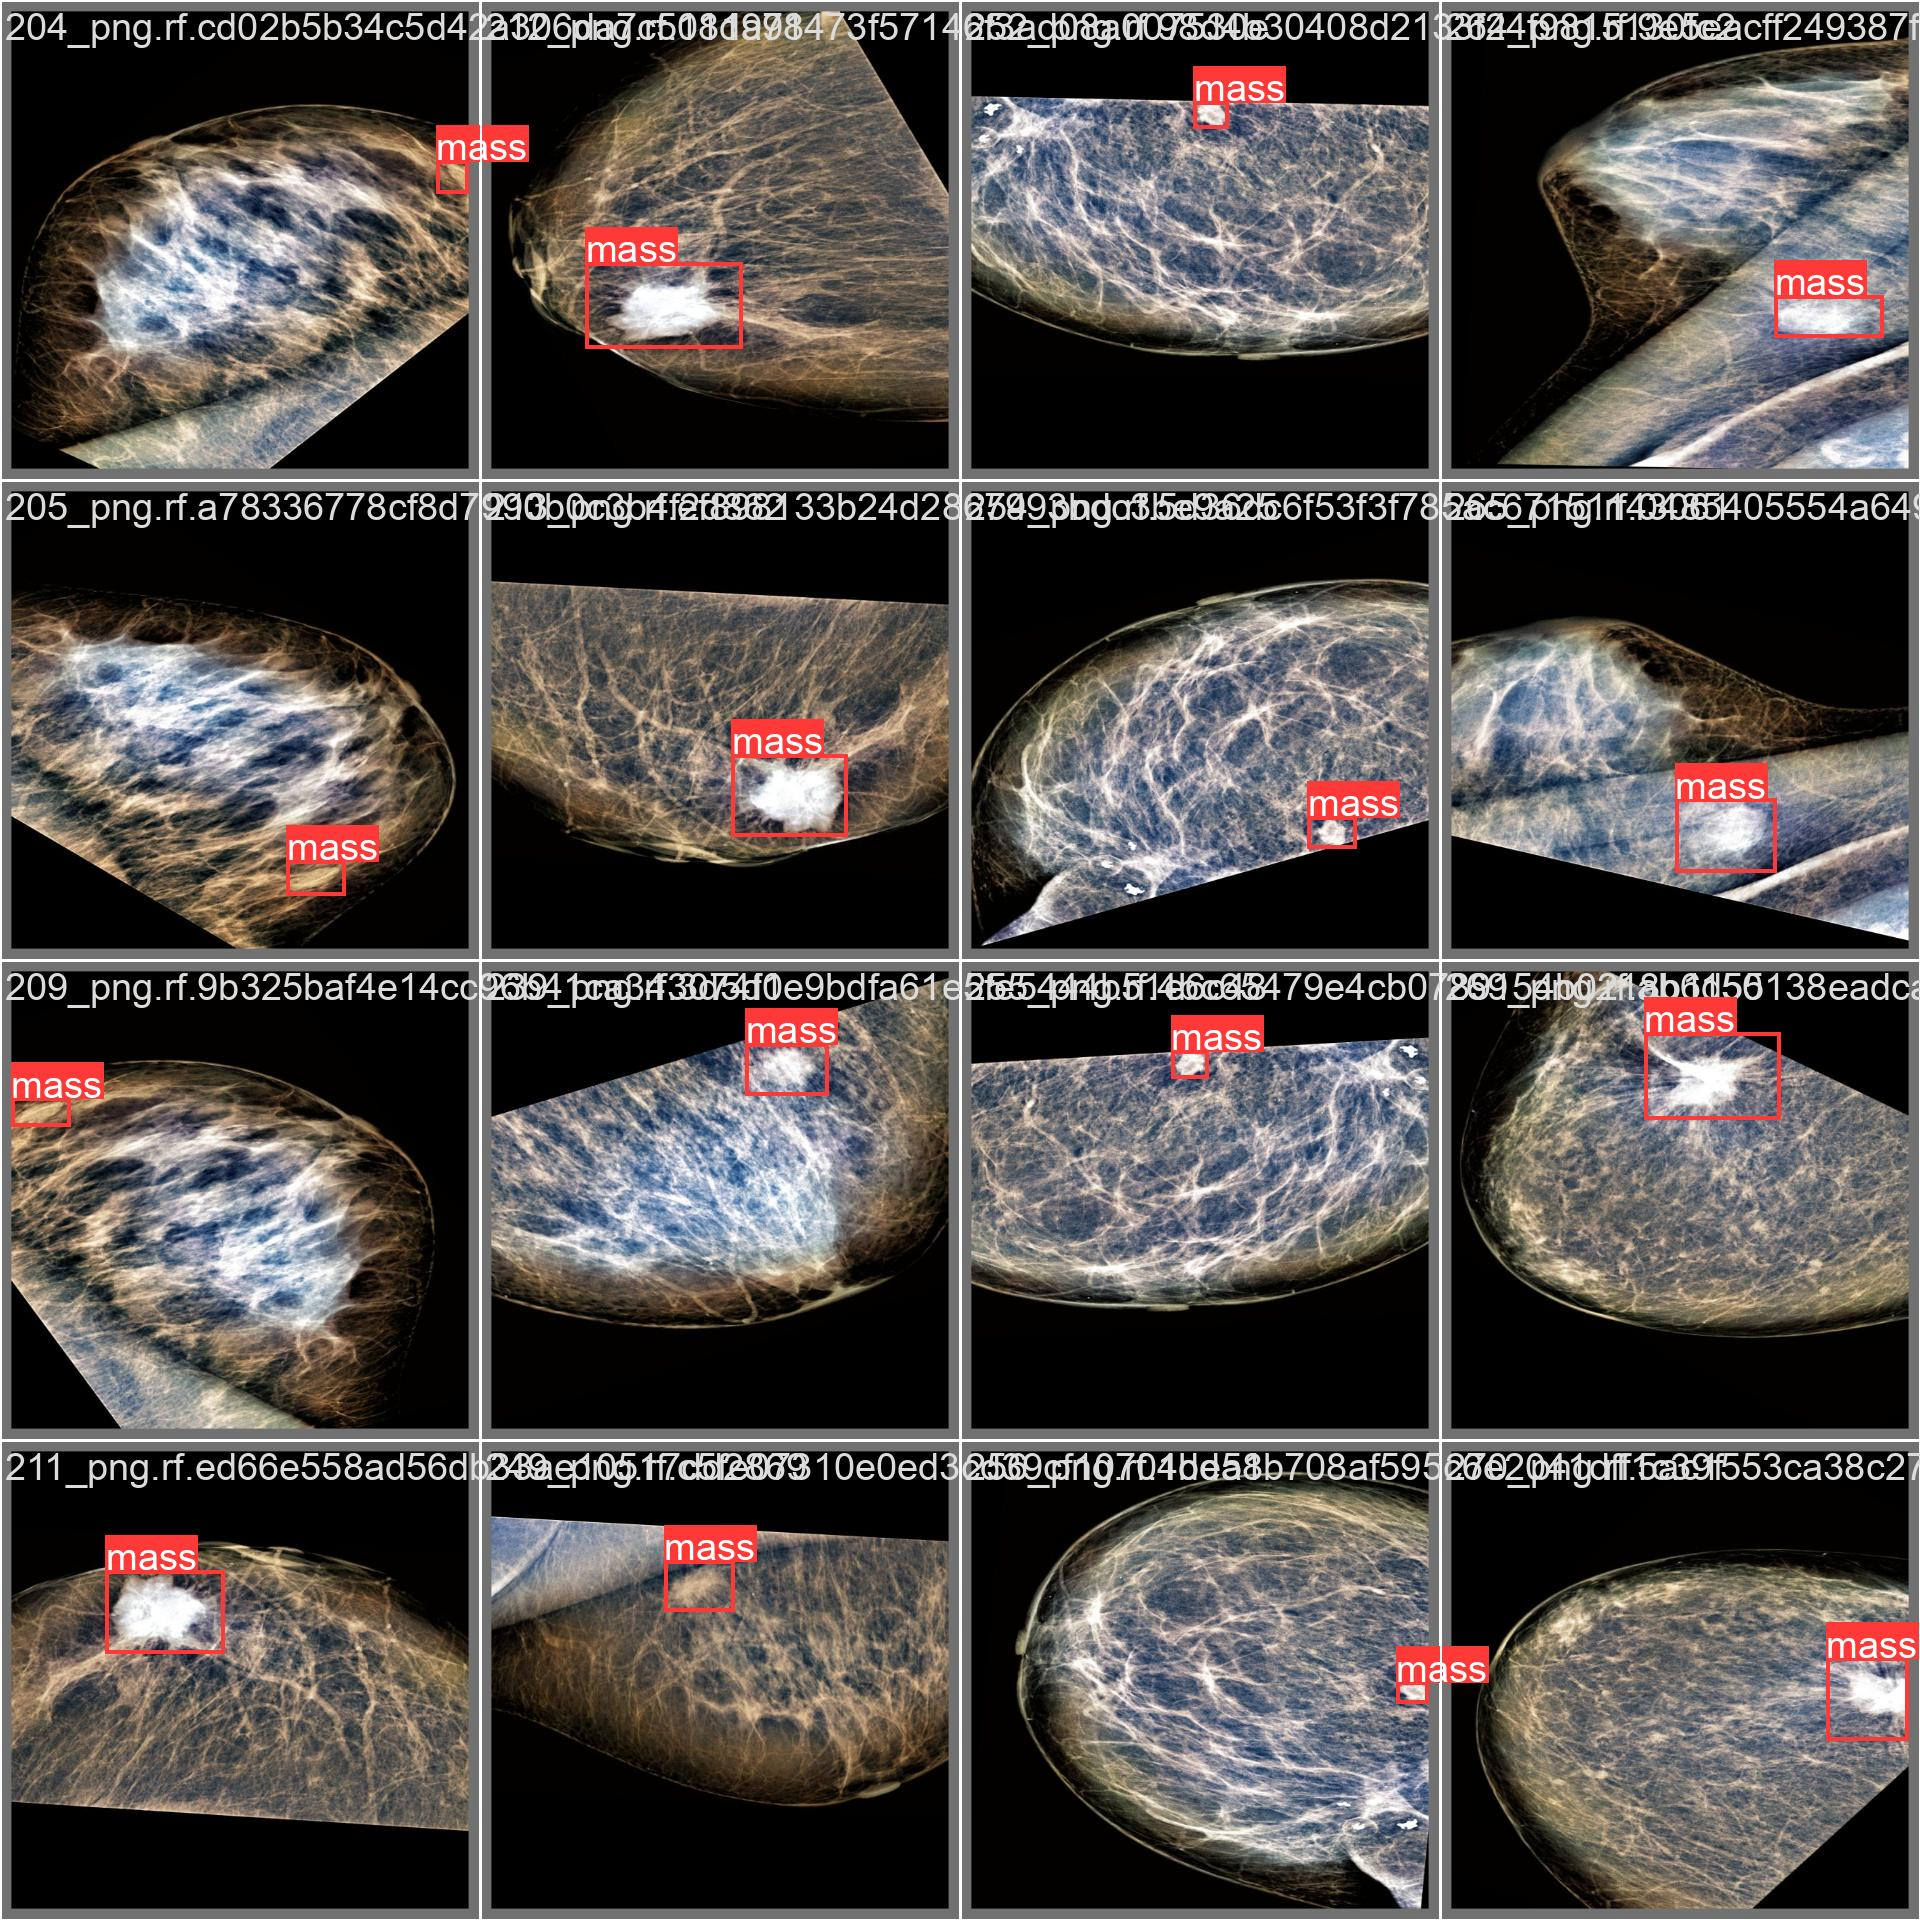

In [48]:
Image(filename=f"{HOME}/runs/train/exp/val_batch1_labels.jpg", width=600)

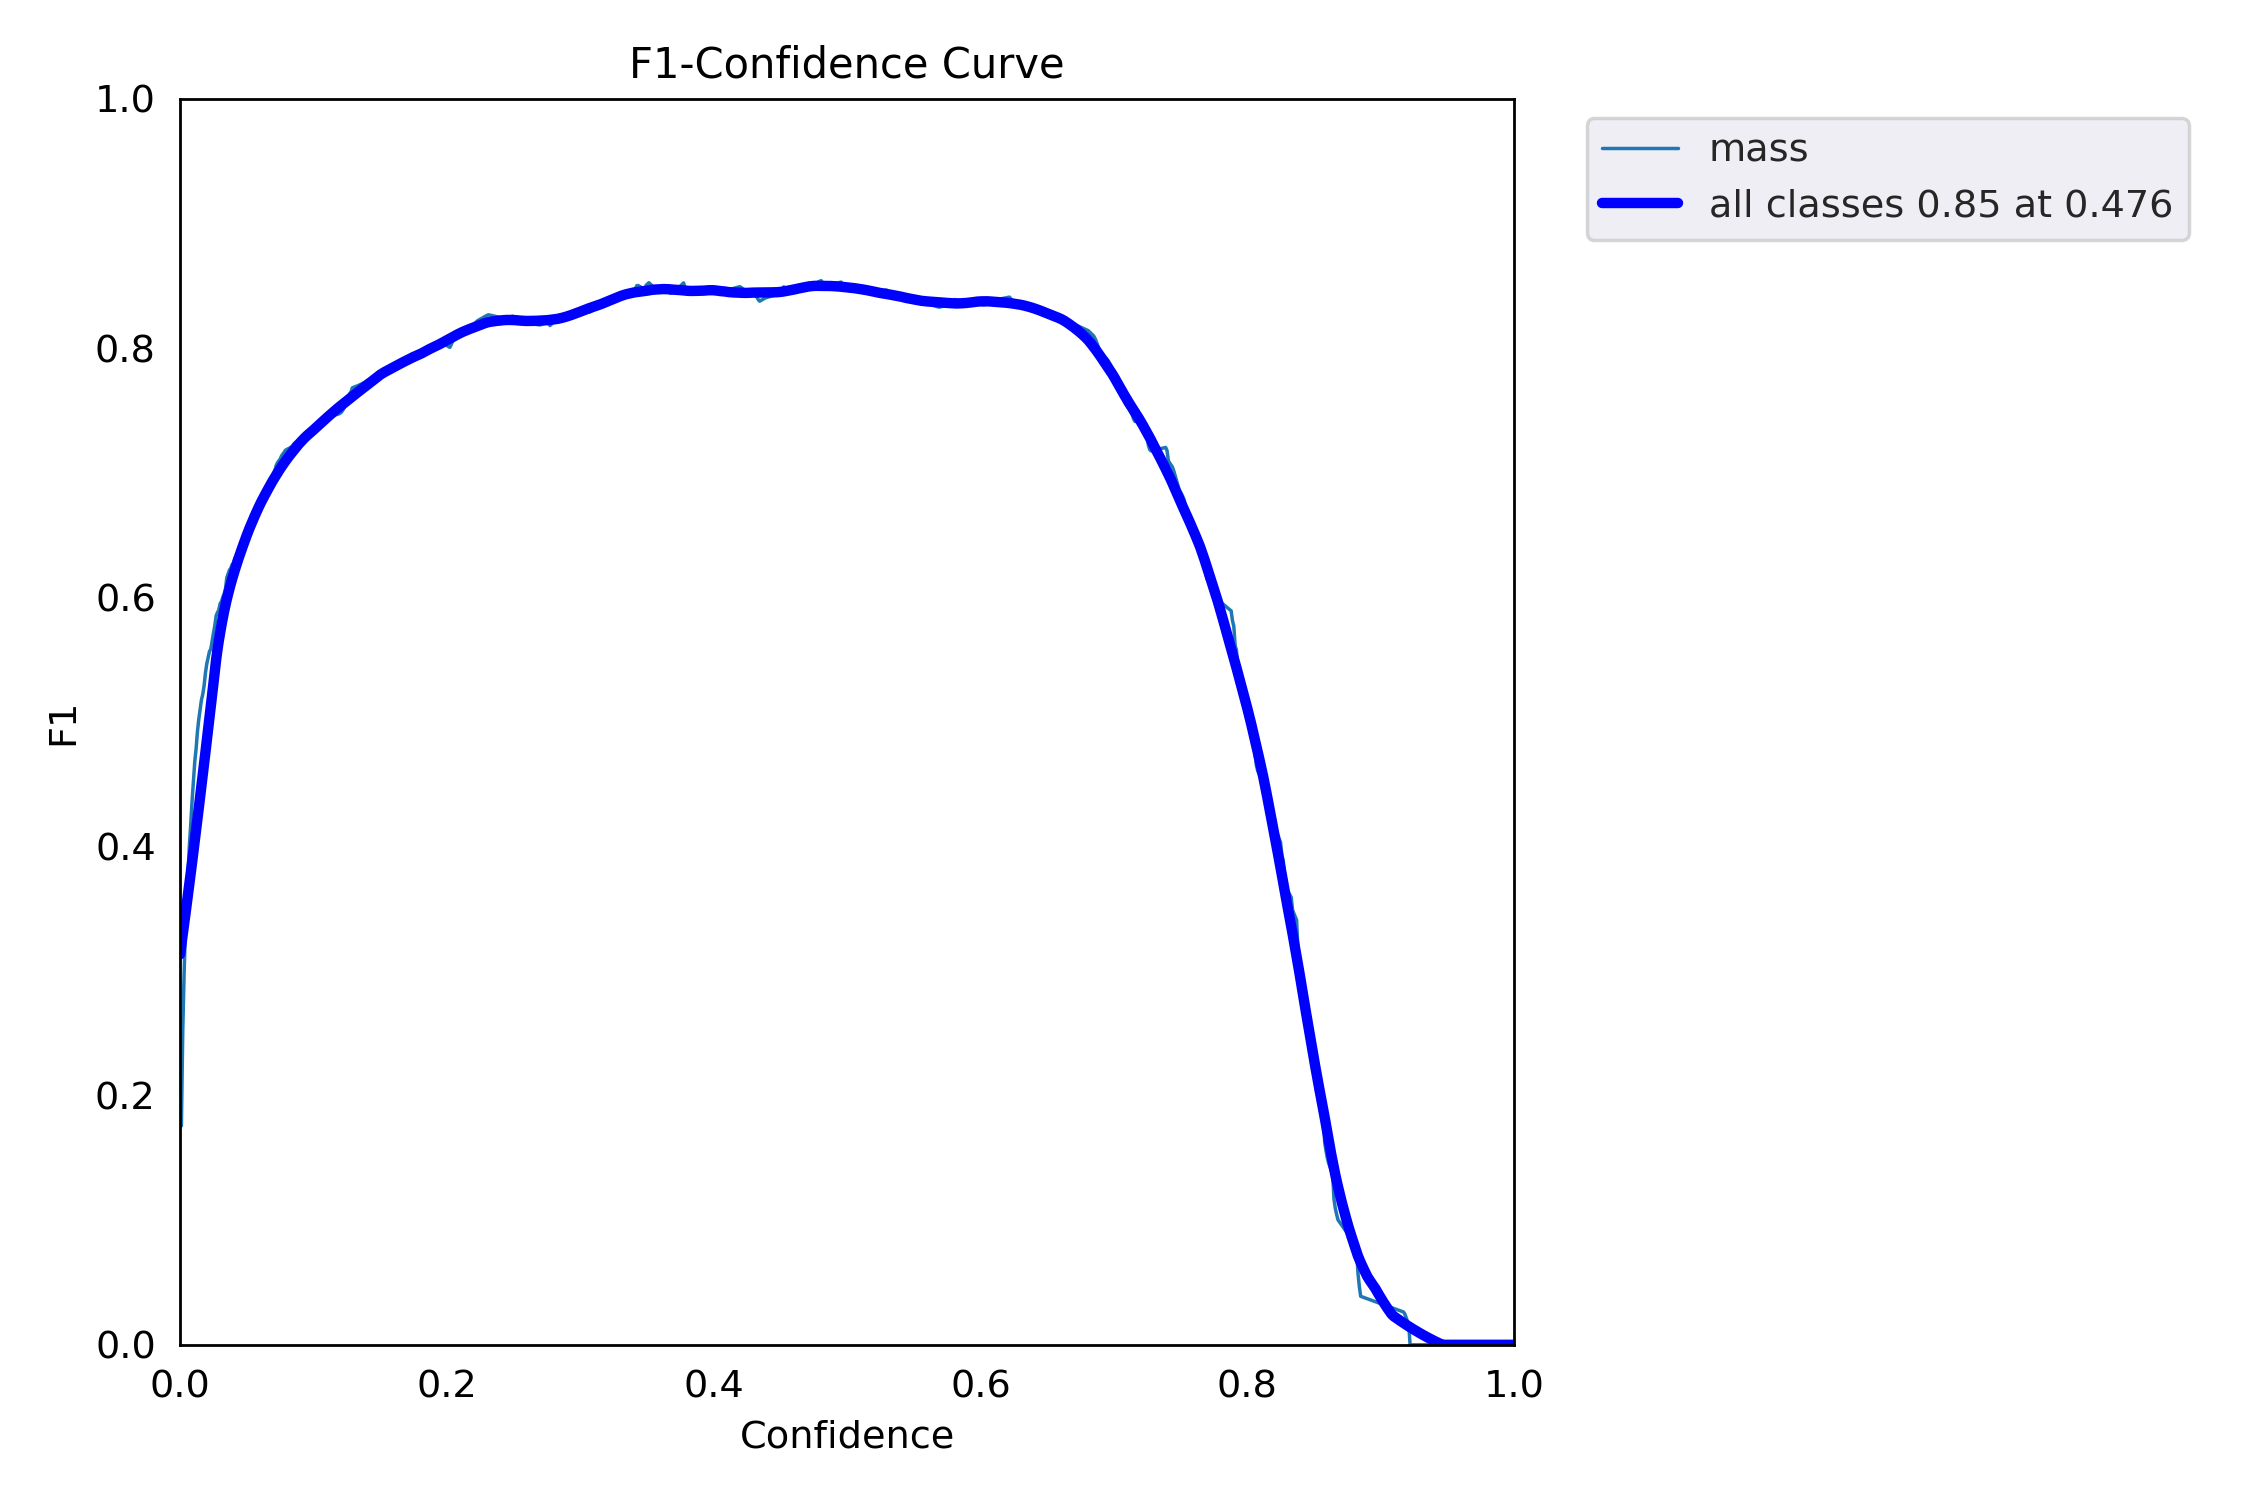

In [49]:
Image(filename=f"{HOME}/runs/train/exp/F1_curve.png", width=600)

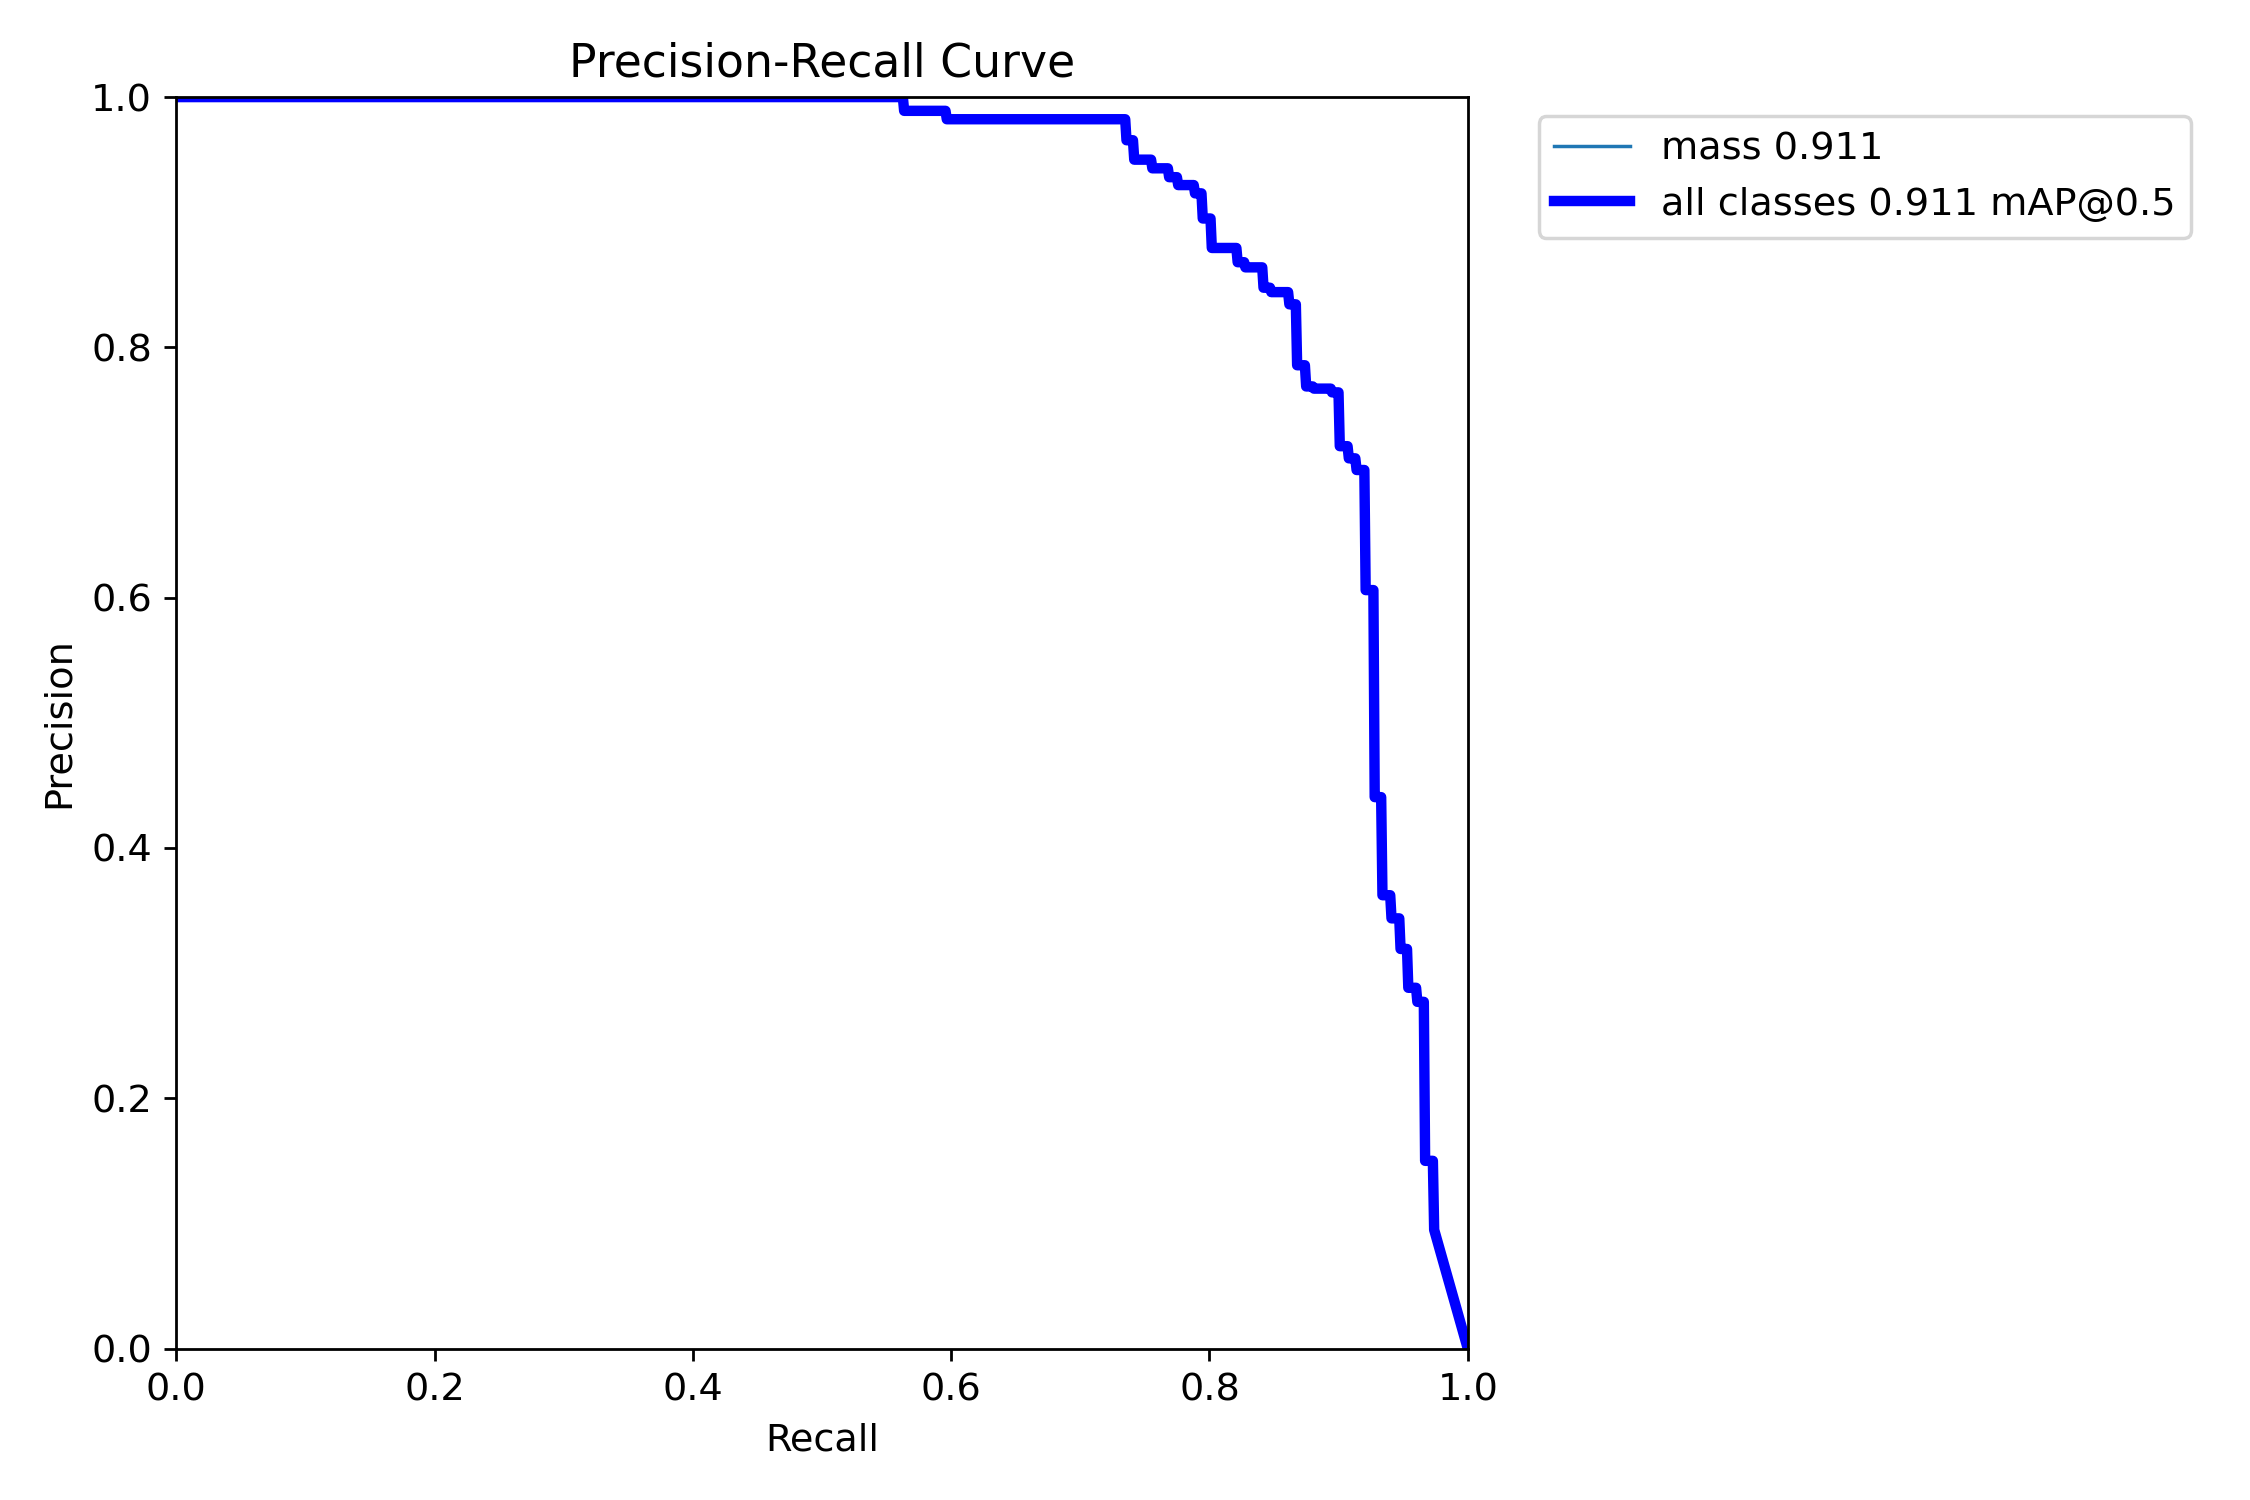

In [50]:
Image(filename=f"{HOME}/runs/train/exp/PR_curve.png", width=600)

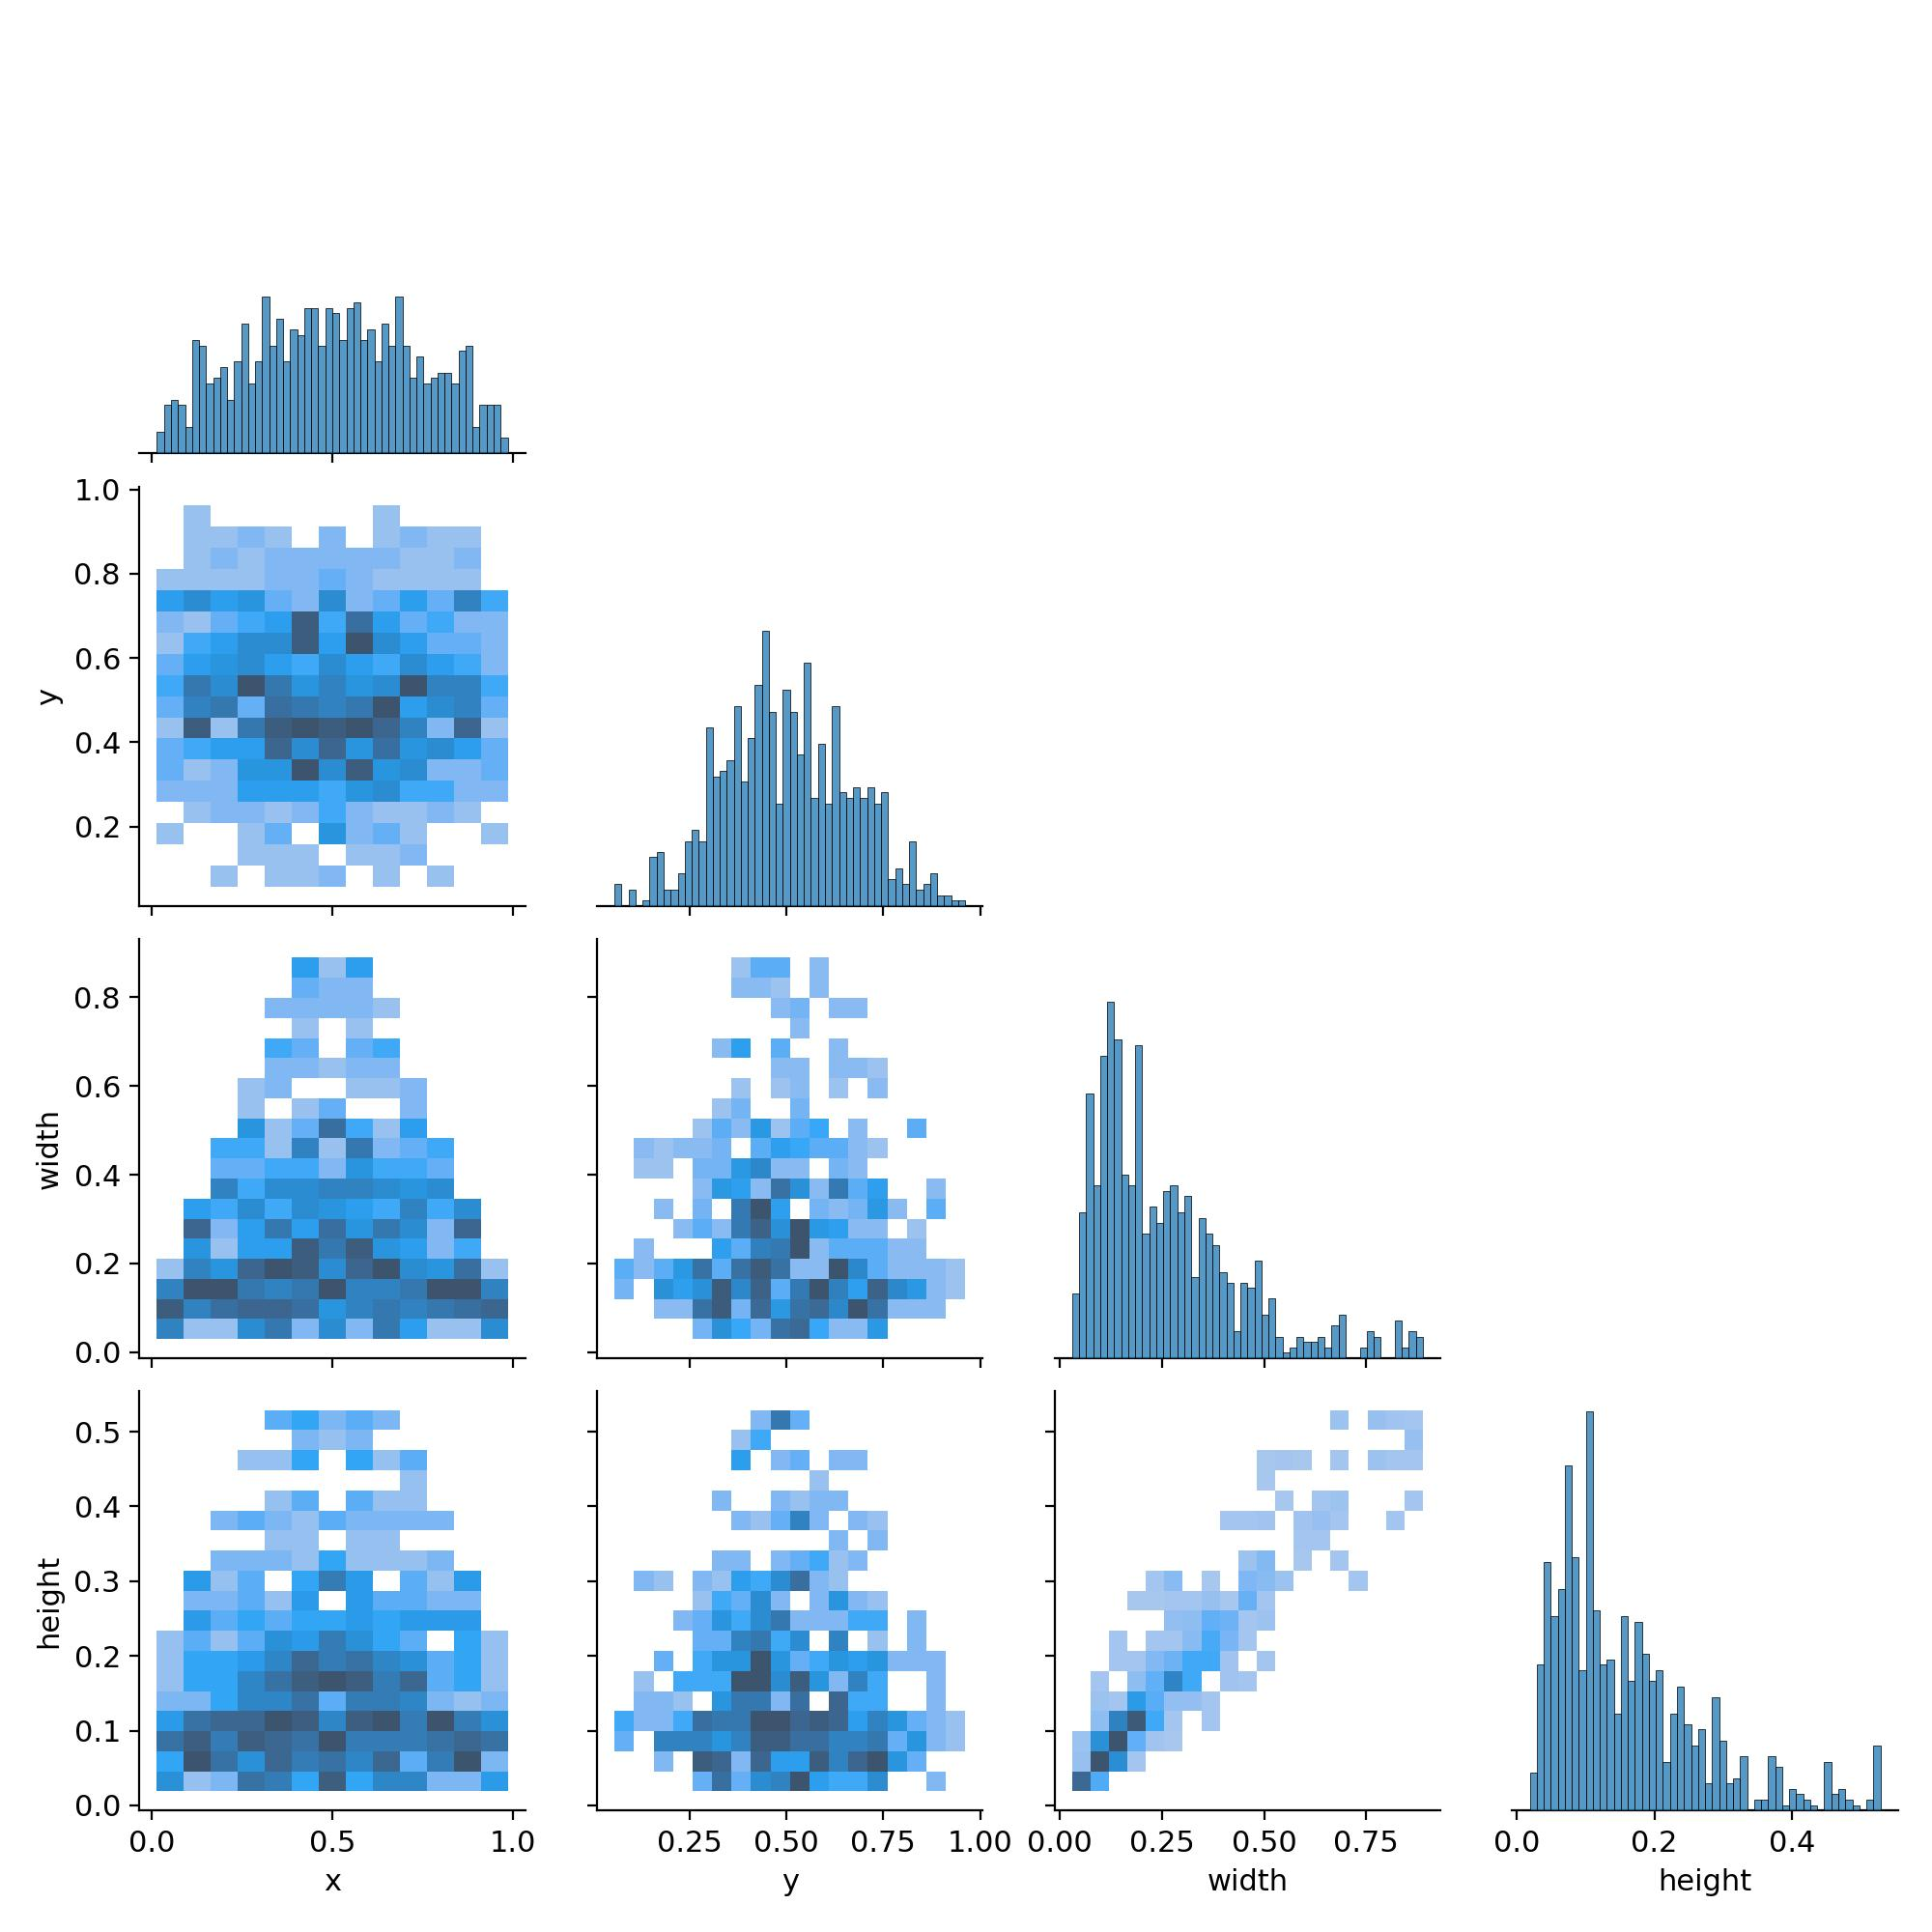

In [56]:
Image(filename=f"{HOME}/runs/train/exp/labels_correlogram.jpg", width=600)

In [55]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/runs/train/exp/weights/best.pt \
--source {dataset.location}/valid/images

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/exp4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

detect: weights=['/content/drive/MyDrive/yolov9/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/yolov9/breast-cancer-1/valid/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
image 1/135 /content/drive/MyDrive/yolov9/breast-cancer-1/valid/images/103_png.rf.289ba988b56ff8aca086764c48e08046.jpg: 1280x1280 1 mass, 112.8ms
image 2/135 /content/drive/MyDrive/yolov9/breast-cancer-1/valid/images/107_png.rf.5fae609ecd415b32b1abeea11ff45a74.jpg: 1280x1280 1 mas